In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

%matplotlib inline

In [266]:
beer_df_clean = pd.read_csv('export_csv/beer_df_clean.csv')
beer_df_clean

,beer_id,beer_name,beer_style,beer_abv,weighted_review,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_profilename,brewery_name,brewery_type,city,state,longitude,latitude
0,64883,Cauldron DIPA,American Double / Imperial IPA,7.7,4.32,4.0,4.5,4.0,4.0,4.5,johnmichaelsen,Caldera Brewing Company,micro,Ashland,Oregon,-122.663374,42.183738
1,52159,Caldera Ginger Beer,Herbed / Spiced Beer,4.7,3.35,3.0,3.5,3.5,3.0,3.5,oline73,Caldera Brewing Company,micro,Ashland,Oregon,-122.663374,42.183738
2,52159,Caldera Ginger Beer,Herbed / Spiced Beer,4.7,3.75,3.5,3.5,3.5,4.0,4.0,Reidrover,Caldera Brewing Company,micro,Ashland,Oregon,-122.663374,42.183738
3,52159,Caldera Ginger Beer,Herbed / Spiced Beer,4.7,3.01,3.0,2.5,3.5,2.0,3.5,alpinebryant,Caldera Brewing Company,micro,Ashland,Oregon,-122.663374,42.183738
4,52159,Caldera Ginger Beer,Herbed / Spiced Beer,4.7,3.68,4.0,3.0,3.5,3.5,4.0,LordAdmNelson,Caldera Brewing Company,micro,Ashland,Oregon,-122.663374,42.183738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563512,58076,Amber Wave,American Amber / Red Ale,5.4,3.46,3.5,3.0,4.0,4.0,3.5,DoubleJ,Pacific Beach Ale House,brewpub,San Diego,California,-117.255265,32.794255
563513,58078,Shipwrecked Stout,American Stout,6.5,3.31,3.0,3.0,4.0,3.5,3.5,glid02,Pacific Beach Ale House,brewpub,San Diego,California,-117.255265,32.794255
563514,58078,Shipwrecked Stout,American Stout,6.5,3.75,3.5,3.5,3.5,4.0,4.0,DoubleJ,Pacific Beach Ale House,brewpub,San Diego,California,-117.255265,32.794255
563515,58385,Belgian Blonde Anniversary Ale,Belgian Pale Ale,6.5,3.63,4.0,3.5,4.0,3.5,3.5,glid02,Pacific Beach Ale House,brewpub,San Diego,California,-117.255265,32.794255


### Rankings

In [94]:
def f(category):
    plt.figure(figsize=(12,15))
    sns.set_theme(style='darkgrid')
    if category in ['beer_name', 'beer_style', 'brewery_name', 'brewery_type']:
        # filter out reviews with less than 10 reviews 
        df_filter = beer_df_clean[category].value_counts()
        df_filter = df_filter[df_filter>9].index
        top25_df = beer_df_clean[beer_df_clean[category].isin(df_filter)]
        # list of top 25
        top25_list = top25_df.groupby(category).mean().weighted_review.sort_values(ascending=False).head(25).index
        # plot
        sns.pointplot(data=top25_df, x='weighted_review', y=category, order=top25_list, capsize=0.2)
        plt.grid(True)
        plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
        plt.yticks(fontsize=12.5)
        if category == 'beer_name':     
            plt.title('Top 25 Beers by Average Review Score', fontsize=18, weight='bold', pad=20)
            plt.ylabel('Beer Name', fofntsize=16, weight='bold', labelpad=10)
        elif category == 'beer_style':
            plt.title('Top 25 Beer Styles by Average Review Score', fontsize=18, weight='bold', pad=20)
            plt.ylabel('Beer Style', fontsize=16, weight='bold', labelpad=10)
        elif category == 'brewery_name':
            plt.title('Top 25 Breweries by Average Review Score', fontsize=18, weight='bold', pad=20)
            plt.ylabel('Brewery Name', fontsize=16, weight='bold', labelpad=10)
        elif category == 'brewery_type':
            plt.title('Brewery Type by Average Review Score', fontsize=18, weight='bold', pad=20)
            plt.ylabel('Brewery Type', fontsize=16, weight='bold', labelpad=10)
    elif category == 'state':
        # descending order for the plot
        top_states = beer_df_clean.groupby('state').weighted_review.mean().sort_values(ascending=False).index
        # plot
        sns.pointplot(data=beer_df_clean, x='weighted_review', y='state', order=top_states, capsize=0.2)
        plt.grid(True)
        plt.title('States by Average Review Score', fontsize=18, weight='bold', pad=20)
        plt.ylabel('State', fontsize=16, weight='bold', labelpad=10)
        plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
        plt.yticks(fontsize=12.5)
    elif category == 'city':
        # filter out cities with less than 10 reviews
        city_filter = beer_df_clean.city.value_counts()
        city_filter = city_filter[city_filter>9].index
        top_cities_df = beer_df_clean[beer_df_clean.city.isin(city_filter)]
        # top 25
        top25_cities = top_cities_df.groupby('city').mean().weighted_review.sort_values(ascending=False).head(25).index
        # plot
        sns.pointplot(data=top_cities_df, x='weighted_review', y='city', order=top25_cities, capsize=0.2)
        plt.grid(True)
        plt.title('Top 25 Cities by Average Review Score', fontsize=18, weight='bold', pad=20)
        plt.ylabel('City', fontsize=16, weight='bold', labelpad=10)
        plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
        plt.yticks(fontsize=12.5)    
    ;

categories = {
    'Top Rated Beer':'beer_name', 
    'Top Rated Beer Styles':'beer_style',
    'Top Rated Breweries':'brewery_name',
    'Top Rated Brewery Types':'brewery_type',
    'Top Rated States':'state',
    'Top Rated Cities':'city'
}
widgets.interact(f, category=categories)

interactive(children=(Dropdown(description='category', options={'Top Rated Beer': 'beer_name', 'Top Rated Beer…

<function __main__.f(category)>

-------

### Geospatial Visualizations

In [267]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

top_states = pd.read_csv('export_csv/state_data.csv')
top_cities = pd.read_csv('export_csv/city_data.csv')

In [268]:
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{'type':'choropleth'}], [{'type':'scattergeo'}]],
    subplot_titles=['Average Beer Rating by State<br>(Hover for more info)',
                   'Average Beer Rating by City<br>(Click on legend to toggle ratings)'],
    vertical_spacing=0.12)

# states
fig.add_trace(go.Choropleth(
    locations = top_states['state_code'],
    z = top_states['mean'],
    locationmode = 'USA-states',
    text = 'State: ' + top_states['state']+'<br>'+\
            'Review score: ' + top_states['mean'].astype(str)+'<br>'+\
            '# of reviews: ' + top_states['count'].astype(str),
    hoverlabel_namelength = 0,
    hoverinfo = 'text',
    name = 'Info',
    colorscale = 'Blues',
    colorbar = dict(
        ticks='outside',
        title = 'Review<br>Score',
        len = 0.4,
        x=0.98,
        y=0.8
        )), row=1, col=1)

# cities
limits = [1,2,3,4]
colors = ['lightcyan', 'rgb(59,59,59)', 'cornflowerblue', 'rgb(241,105,19)']

# trace for dummy data, used to populate a 1-2 marker in the legend. 
df_1_2 = top_cities.query("city == 'Dummy row'")    
fig.add_trace(go.Scattergeo(
    name = '1 - 2',
    visible = 'legendonly',
    showlegend = True,
    lon = df_1_2['longitude'],
    lat = df_1_2['latitude'],
    marker = dict(
        color = 'lightgrey',
        line_color = 'rgb(40,40,40)',
        line_width = 0.5,
        size = 8)), row=2, col=1)

# city review data
for i in range(len(limits)):
    df_sub = top_cities[top_cities['mean'].between(i+1, i+2)]
    df_sub['count'] = df_sub['count'].astype(int)
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = 'City: ' + df_sub['city'] +'<br>'+\
                'Review score: '+ df_sub['mean'].astype(str)+'<br>'+\
                '# of reviews: '+ df_sub['count'].astype(str),
        hoverinfo = 'text',
        name = f'{i+1} - {i+2}',
        marker = dict(
            color = colors[i],
            opacity = 0.8,
            size = 8,
            line_color = 'rgb(40,40,40)',
            line_width = 0.5)), row=2, col=1)

fig.update_layout(
    geo = dict(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'),
    height=1000,
    legend = dict(
            title = 'Review Score',
            x = 0.95,
            y = 0.15),
    **{'geo2_scope': 'usa'}
)

C:\Users\mcmco\anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-------

### Multivariate

In [271]:
top25_upper_abv = pd.read_csv('export_csv/upper_abv.csv')
top25_median_abv = pd.read_csv('export_csv/median_abv.csv')
top25_lower_abv = pd.read_csv('export_csv/lower_abv.csv')

In [280]:
def f(quartile):
    plt.figure(figsize=(12,15))
    sns.set_theme(style='darkgrid')
    # upper quartile
    if quartile == 'Top Rated High ABV Beer':
        upperqrt_abv = beer_df_clean.query('beer_abv >= 8')
        ax = sns.pointplot(data=upperqrt_abv, x='weighted_review', y='beer_name', order=top25_upper_abv.beer_name)
        plt.grid(True)
        plt.title('Top Rated High ABV Beers', fontsize=18, weight='bold', pad=20)
        plt.ylabel('Beer Name', fontsize=16, weight='bold', labelpad=15)
        plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
        # edit ytick labels to show ABV value
        upper_abv = top25_upper_abv.beer_abv.tolist()
        labels_upper = [item.get_text() for item in ax.get_yticklabels()]
        labels_upper_abv = [f'{label} [{upper_abv[i]} ABV]' for i, label in enumerate(labels_upper)]
        ax.set_yticklabels(labels_upper_abv, fontsize=12.5);
    # median quartile
    elif quartile == 'Top Rated Median ABV Beer':
        medianqrt_abv = beer_df_clean.query('5.2 < beer_abv < 8.0')
        ax=sns.pointplot(data=medianqrt_abv, x='weighted_review', y='beer_name', order=top25_median_abv.beer_name)
        plt.grid(True)
        plt.title('Top Rated Median ABV Beers', fontsize=18, weight='bold', pad=20)
        plt.ylabel('Beer Name', fontsize=16, weight='bold', labelpad=15)
        plt.xlabel('Average Review Score', fontsize=16, weight='bold', labelpad=20)
        median_abv = top25_median_abv.beer_abv.tolist()
        labels_median = [item.get_text() for item in ax.get_yticklabels()]
        labels_median_abv = [f'{label} [{median_abv[i]} ABV]' for i, label in enumerate(labels_median)]
        ax.set_yticklabels(labels_median_abv, fontsize=12.5)
    # lower quartile
    elif quartile == 'Top Rated Low ABV Beer':
        lowerqrt_abv = beer_df_clean.query('beer_abv <= 5.2')
        ax = sns.pointplot(data=lowerqrt_abv, x='weighted_review', y='beer_name', order=top25_lower_abv.beer_name)
        plt.grid(True)
        plt.title('Top Rated Low ABV Beers', fontsize=18, weight='bold', pad=20)
        plt.ylabel('Beer Name', fontsize=16, weight='bold', labelpad=15)
        plt.xlabel('Average Rating', fontsize=16, weight='bold', labelpad=20)
        lower_abv = top25_lower_abv.beer_abv.tolist()
        labels_lower = [item.get_text() for item in ax.get_yticklabels()]
        labels_low_abv = [f'{label} [{lower_abv[i]} ABV]' for i, label in enumerate(labels_lower)]
        ax.set_yticklabels(labels_low_abv, fontsize=12.5);
    
    
quartiles = ['Top Rated High ABV Beer', 'Top Rated Median ABV Beer', 'Top Rated Low ABV Beer']
widgets.interact(f, quartile=quartiles)

interactive(children=(Dropdown(description='quartile', options=('Top Rated High ABV Beer', 'Top Rated Median A…

<function __main__.f(quartile)>

--------

### Correlations

In [281]:
variables = ['beer_abv', 'weighted_review', 'review_overall', 'review_aroma', 
             'review_appearance', 'review_palate', 'review_taste']

corr_matrix = beer_df_clean[variables].corr()
corr_matrix.style.background_gradient(cmap='Blues').format( '{:0.2f}')

,beer_abv,weighted_review,review_overall,review_aroma,review_appearance,review_palate,review_taste
beer_abv,1.00,0.27,0.10,0.31,0.24,0.27,0.26
weighted_review,0.27,1.00,0.86,0.83,0.62,0.80,0.95
review_overall,0.10,0.86,1.00,0.60,0.48,0.68,0.78
review_aroma,0.31,0.83,0.60,1.00,0.53,0.59,0.70
review_appearance,0.24,0.62,0.48,0.53,1.00,0.54,0.52
review_palate,0.27,0.80,0.68,0.59,0.54,1.00,0.71
review_taste,0.26,0.95,0.78,0.70,0.52,0.71,1.00


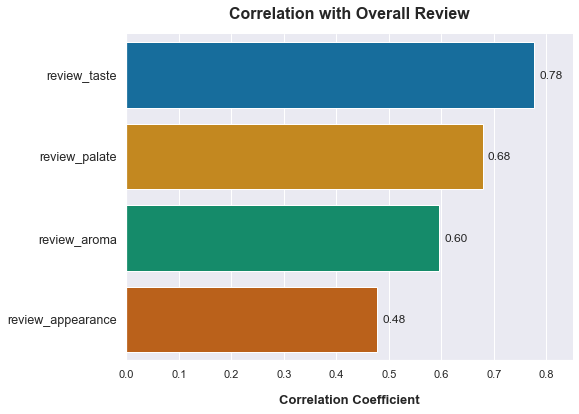

In [338]:
data_corr = corr_matrix['review_overall'].drop(['review_overall', 'weighted_review', 'beer_abv']).reset_index().sort_values('review_overall', ascending=False)

plt.figure(figsize=(8,6))
ax = sns.barplot(data = data_corr, x='review_overall', y='index', palette='colorblind')
plt.title('Correlation with Overall Review', pad=15, fontsize=16, weight='bold')
plt.ylabel('')
plt.xlabel('Correlation Coefficient', labelpad=15, fontsize=13, weight='bold')
plt.xlim(0,0.85)
plt.yticks(fontsize=12.5)
sns.despine();

for p in ax.patches:
    bar_end = p.get_width()
    x = p.get_x() + p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 1.8
    ax.annotate(format(bar_end, '0.2f'), (x,y))

-----

In [312]:
# read in correlation dataframes
reviewer_corr_df = pd.read_csv('export_csv/reviewer_corr.csv')
reviewer50_corr_df = pd.read_csv('export_csv/reviewer50_corr.csv')
reviewer100_corr_df = pd.read_csv('export_csv/reviewer100_corr.csv')

In [337]:
def f(reviewer):
    plt.figure(figsize=(15,10))
    sns.set_style('darkgrid')
    if reviewer == 'Top 10 Reviewers':
        ax = sns.pointplot(data=reviewer_corr_df, x='corr_variable', y='corr', hue='reviewer', linestyles=('dotted'))
        plt.title('Correlation with Overall Review by Reviewer', weight='bold', fontsize=18, pad=15)
        plt.ylabel('Correlation Coefficient', labelpad=25, fontsize=16, weight='bold')
        plt.xlabel('Correlation Variable', labelpad=25, fontsize=16, weight='bold')
        plt.yticks(fontsize=13)
        plt.xticks(fontsize=13)
        plt.legend(title='Reviewer Username', title_fontsize=14, fontsize=13)
        # Variance
        print('Variances of')
        print(reviewer_corr_df.groupby('corr_variable', sort=False).var()['corr'])
    elif reviewer == 'Top 50 Reviewers':
        ax = sns.pointplot(data=reviewer50_corr_df, x='corr_variable', y='corr', hue='reviewer', linestyles=('dotted'), palette='Blues')
        plt.title('Correlation with Overall Review by Reviewer', weight='bold', fontsize=18, pad=15)
        plt.ylabel('Correlation Coefficient', labelpad=25, fontsize=16, weight='bold')
        plt.xlabel('Correlation Variable', labelpad=25, fontsize=16, weight='bold')
        plt.yticks(fontsize=13)
        plt.xticks(fontsize=13)
        ax.get_legend().remove()
        print('Variances of')
        print(reviewer50_corr_df.groupby('corr_variable', sort=False).var()['corr'])
    elif reviewer == 'Top 100 Reviewers':
        ax = sns.pointplot(data=reviewer100_corr_df, x='corr_variable', y='corr', hue='reviewer', linestyles=('dotted'), palette='Blues')
        plt.title('Correlation with Overall Review by Reviewer', weight='bold', fontsize=20, pad=15)
        plt.ylabel('Correlation Coefficient', labelpad=25, fontsize=16, weight='bold')
        plt.xlabel('Correlation Variable', labelpad=25, fontsize=16, weight='bold')
        plt.yticks(fontsize=13)
        plt.xticks(fontsize=13)
        ax.get_legend().remove()
        print('Variances of')
        print(reviewer100_corr_df.groupby('corr_variable', sort=False).var()['corr'])
        
        
reviewers = ['Top 10 Reviewers', 'Top 50 Reviewers', 'Top 100 Reviewers']
widgets.interact(f, reviewer=reviewers)

interactive(children=(Dropdown(description='reviewer', options=('Top 10 Reviewers', 'Top 50 Reviewers', 'Top 1…

<function __main__.f(reviewer)>